Please uncomment the first cell to install Yellowbrick package (more about it in the report). 
!WARNING! C:/ drive must be given all permissions.

In [ ]:
#pip install yellowbrick --user

Part of the script responsible for creating the plots showcasing the Silhouette Score has been pulled from : https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/#Perform_Comparative_Analysis_to_Determine_Best_value_of_K_using_Silhouette_Plot

In [1]:
import numpy as np
import pandas as pd
import os
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'whitegrid' ,font_scale = 1.5, color_codes=True)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, v_measure_score
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
inceptionv = h5py.File('inceptionv3_dim_reduced_feature.h5', mode='r')
list(inceptionv.keys())

['file_name', 'pca_feature', 'umap_feature']

In [3]:
dataset_fname=inceptionv['file_name']
dataset_pca=inceptionv['pca_feature']
dataset_umap=inceptionv['umap_feature']

In [4]:
ground_truth=dataset_fname[:]

In [5]:
range_n_clusters=np.arange(2,12)

In [6]:
X_pca = dataset_pca[:]

Silhouette Score is 0.3311903178691864 when number of clusters are 2
V Measure Score is 0.1218258819057197 when number of clusters are 2
Silhouette Score is 0.2516070306301117 when number of clusters are 3
V Measure Score is 0.219221833197738 when number of clusters are 3
Silhouette Score is 0.25799745321273804 when number of clusters are 4
V Measure Score is 0.25521674779894055 when number of clusters are 4
Silhouette Score is 0.242239311337471 when number of clusters are 5
V Measure Score is 0.30082854898193734 when number of clusters are 5
Silhouette Score is 0.22631442546844482 when number of clusters are 6
V Measure Score is 0.336253681134758 when number of clusters are 6
Silhouette Score is 0.22692564129829407 when number of clusters are 7
V Measure Score is 0.3652105380370707 when number of clusters are 7
Silhouette Score is 0.22511334717273712 when number of clusters are 8
V Measure Score is 0.3827886816554283 when number of clusters are 8
Silhouette Score is 0.2239283174276352

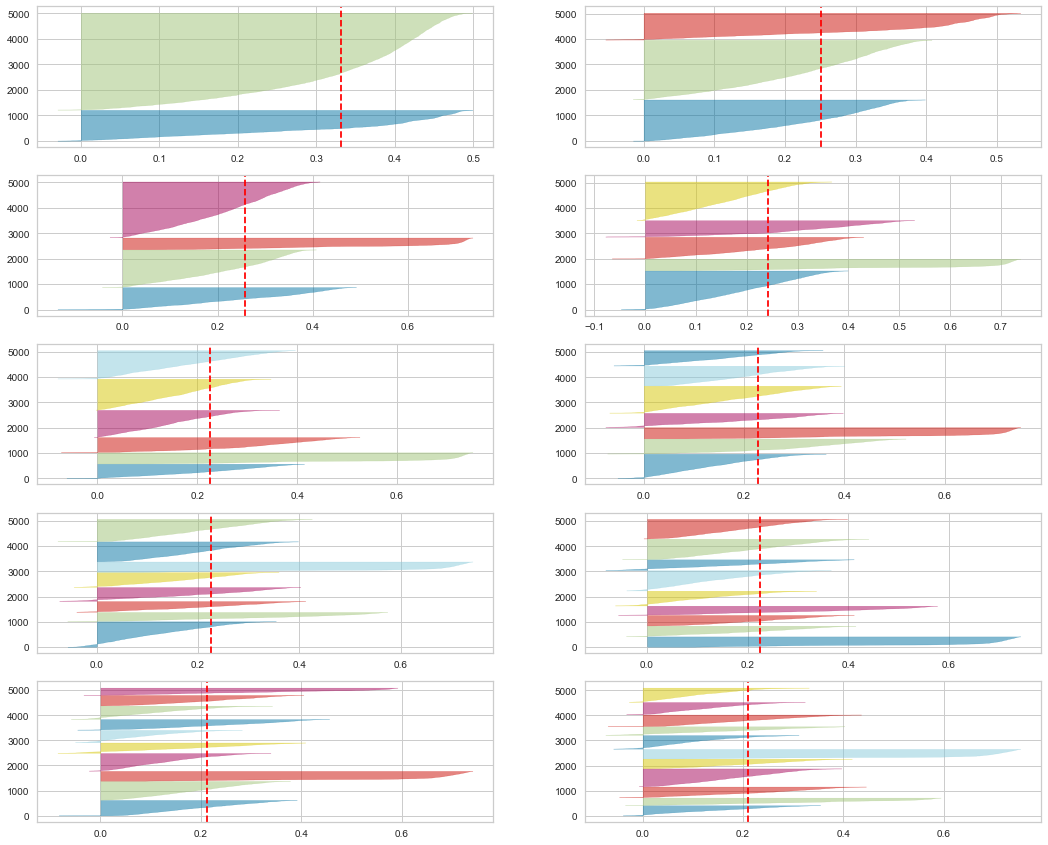

In [7]:
fig, ax = plt.subplots(5, 2, figsize=(18,15))
for n_clusters in range_n_clusters:
    kmeans_pca = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
    y=kmeans_pca.fit_predict(X_pca)
    score = silhouette_score(X_pca, y, metric='euclidean')
    print('Silhouette Score is {} when number of clusters are {}'.format(score, n_clusters))
    vms=v_measure_score(ground_truth, y)
    print('V Measure Score is {} when number of clusters are {}'.format(vms, n_clusters))
    q, mod = divmod(n_clusters, 2)
    visualizer = SilhouetteVisualizer(kmeans_pca, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_pca)

In [8]:
kmeans_pca = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

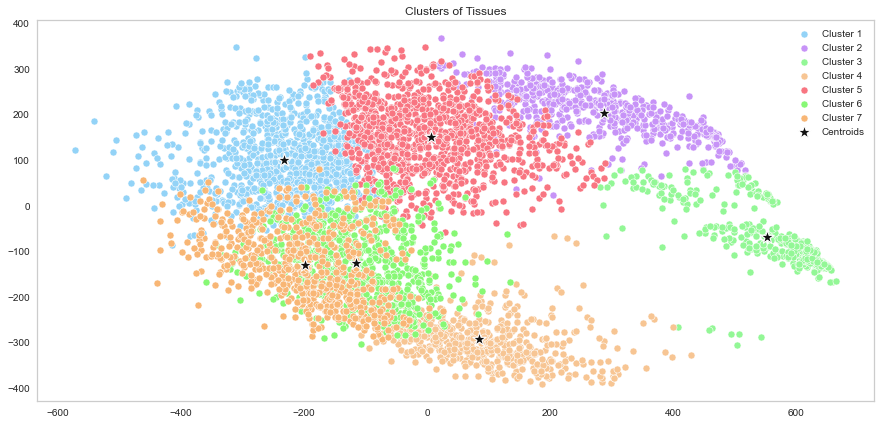

In [9]:
plt.figure(figsize=(15,7))
sns.scatterplot(X_pca[y_kmeans_pca == 0, 0], X_pca[y_kmeans_pca == 0, 1], color = '#93d3f7', label = 'Cluster 1',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 1, 0], X_pca[y_kmeans_pca == 1, 1], color = '#c793f7', label = 'Cluster 2',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 2, 0], X_pca[y_kmeans_pca == 2, 1], color = '#93f796', label = 'Cluster 3',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 3, 0], X_pca[y_kmeans_pca == 3, 1], color = '#f7c593', label = 'Cluster 4',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 4, 0], X_pca[y_kmeans_pca == 4, 1], color = '#f87581', label = 'Cluster 5',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 5, 0], X_pca[y_kmeans_pca == 5, 1], color = '#87f875', label = 'Cluster 6',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 6, 0], X_pca[y_kmeans_pca == 6, 1], color = '#f8b675', label = 'Cluster 7',s=50)
sns.scatterplot(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], color = 'k', 
                label = 'Centroids',s=200,marker='*')
plt.grid(False)
plt.title('Clusters of Tissues')
plt.legend()
plt.show()

In [10]:
X_umap = dataset_umap[:]

Silhouette Score is 0.3506123125553131 when number of clusters are 2
V Measure Score is 0.05551531338240297 when number of clusters are 2
Silhouette Score is 0.21842585504055023 when number of clusters are 3
V Measure Score is 0.18926051271102082 when number of clusters are 3
Silhouette Score is 0.23991523683071136 when number of clusters are 4
V Measure Score is 0.24623137715273372 when number of clusters are 4
Silhouette Score is 0.21621234714984894 when number of clusters are 5
V Measure Score is 0.300501776451946 when number of clusters are 5
Silhouette Score is 0.20453880727291107 when number of clusters are 6
V Measure Score is 0.3351632782948682 when number of clusters are 6
Silhouette Score is 0.20208944380283356 when number of clusters are 7
V Measure Score is 0.3490579294330481 when number of clusters are 7
Silhouette Score is 0.187498077750206 when number of clusters are 8
V Measure Score is 0.375409126304974 when number of clusters are 8
Silhouette Score is 0.19566854834556

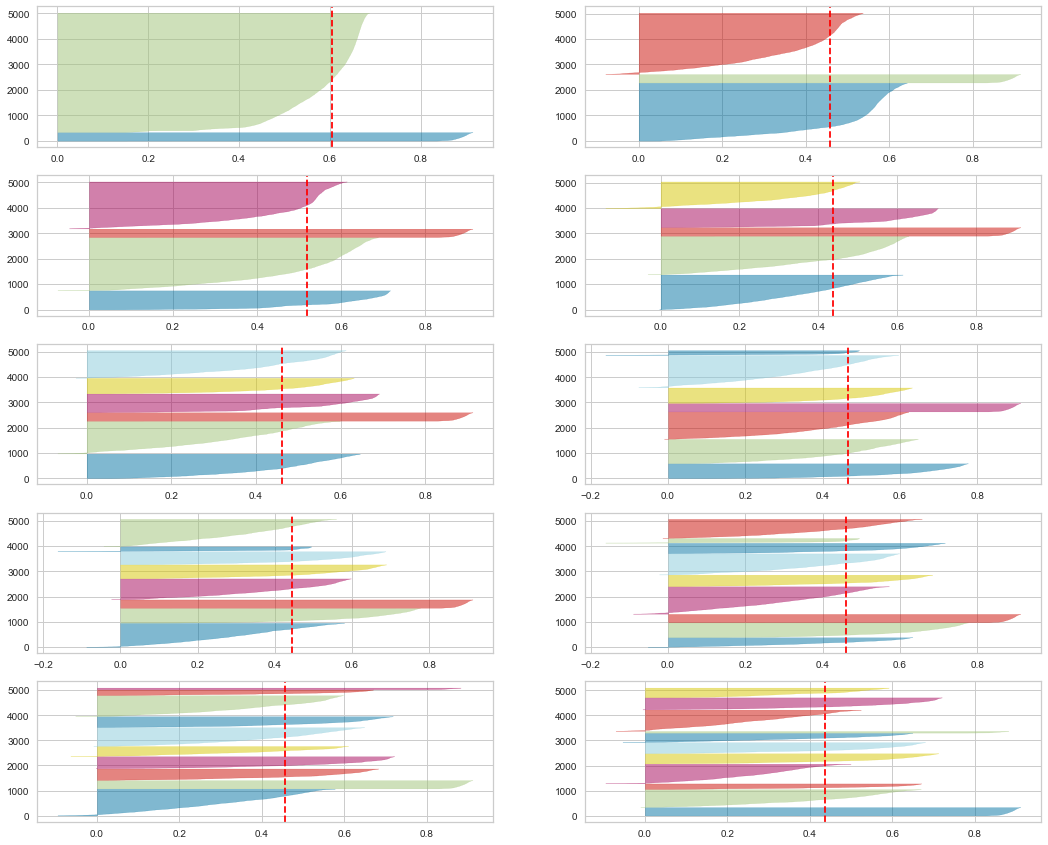

In [11]:
fig, ax = plt.subplots(5, 2, figsize=(18,15))
for n_clusters in range_n_clusters:
    kmeans_umap = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
    y=kmeans_umap.fit_predict(X_umap)
    score = silhouette_score(X_pca, y, metric='euclidean')
    print('Silhouette Score is {} when number of clusters are {}'.format(score, n_clusters))
    vms=v_measure_score(ground_truth, y)
    print('V Measure Score is {} when number of clusters are {}'.format(vms, n_clusters))
    q, mod = divmod(n_clusters, 2)
    visualizer = SilhouetteVisualizer(kmeans_umap, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_umap)

In [12]:
kmeans_umap = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans_umap = kmeans_umap.fit_predict(X_umap)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

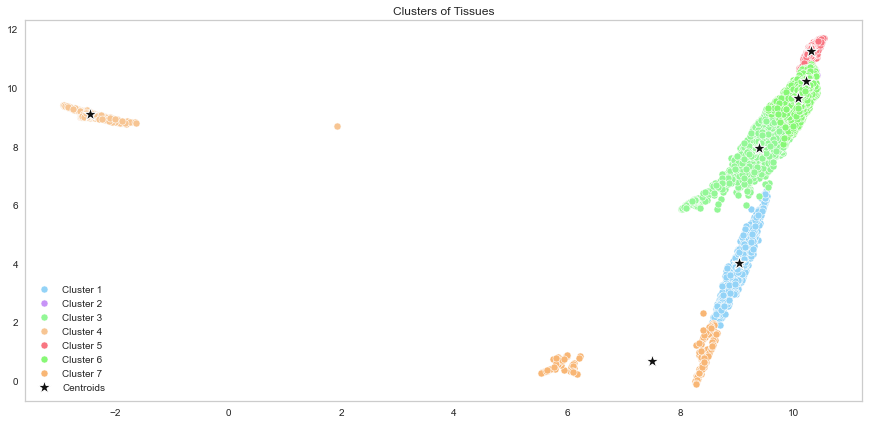

In [13]:
plt.figure(figsize=(15,7))
sns.scatterplot(X_umap[y_kmeans_umap == 0, 0], X_umap[y_kmeans_umap == 0, 1], color = '#93d3f7', label = 'Cluster 1',s=50)
sns.scatterplot(X_umap[y_kmeans_umap == 1, 0], X_umap[y_kmeans_umap == 1, 1], color = '#c793f7', label = 'Cluster 2',s=50)
sns.scatterplot(X_umap[y_kmeans_umap == 2, 0], X_umap[y_kmeans_umap == 2, 1], color = '#93f796', label = 'Cluster 3',s=50)
sns.scatterplot(X_umap[y_kmeans_umap == 3, 0], X_umap[y_kmeans_umap == 3, 1], color = '#f7c593', label = 'Cluster 4',s=50)
sns.scatterplot(X_umap[y_kmeans_umap == 4, 0], X_umap[y_kmeans_umap == 4, 1], color = '#f87581', label = 'Cluster 5',s=50)
sns.scatterplot(X_umap[y_kmeans_umap == 5, 0], X_umap[y_kmeans_umap == 5, 1], color = '#87f875', label = 'Cluster 6',s=50)
sns.scatterplot(X_umap[y_kmeans_umap == 6, 0], X_umap[y_kmeans_umap == 6, 1], color = '#f8b675', label = 'Cluster 7',s=50)
sns.scatterplot(kmeans_umap.cluster_centers_[:, 0], kmeans_umap.cluster_centers_[:, 1], color = 'k', 
                label = 'Centroids',s=200,marker='*')
plt.grid(False)
plt.title('Clusters of Tissues')
plt.legend()
plt.show()